# **Hpothesis Testing**

# **Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly


#Scipy
from scipy import stats
from scipy.stats import norm, pearsonr
import statsmodels.api as sm

# Warnings 
import warnings 
warnings.filterwarnings("ignore")

# **Loading The Data**

In [2]:
# Loading the NYC Restaurant Data 
rd = pd.read_csv('rd')

In [3]:
# Loading the Yelp Data for NYC Restaurant Data 
ydf = pd.read_csv('ydf')

In [4]:
# Restaurant Inspection data Check 
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211711 entries, 0 to 211710
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  211711 non-null  int64  
 1   DBA                    211024 non-null  object 
 2   BORO                   211711 non-null  object 
 3   BUILDING               211415 non-null  object 
 4   STREET                 211708 non-null  object 
 5   ZIPCODE                209022 non-null  float64
 6   CUISINE DESCRIPTION    209249 non-null  object 
 7   INSPECTION DATE        211711 non-null  object 
 8   ACTION                 209249 non-null  object 
 9   VIOLATION CODE         208120 non-null  object 
 10  VIOLATION DESCRIPTION  208120 non-null  object 
 11  CRITICAL FLAG          211711 non-null  object 
 12  SCORE                  201535 non-null  float64
 13  GRADE                  103387 non-null  object 
 14  GRADE DATE             94613 non-nul

In [5]:
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alias         848 non-null    object 
 1   name          848 non-null    object 
 2   image_url     848 non-null    object 
 3   url           848 non-null    object 
 4   review_count  848 non-null    int64  
 5   categories    848 non-null    object 
 6   rating        848 non-null    float64
 7   coordinates   848 non-null    object 
 8   transactions  848 non-null    object 
 9   location      848 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.4+ KB


# **Selecting Subset of Pizza Restaurants in Brooklyn**

In [6]:
# Selecting subset of only restaurants from Brooklyn
brooklyndf = rd[rd['BORO'].str.lower()=='brooklyn']

In [7]:
# Selecting subset of only restaurants in Brooklyn that have pizza in the cuisine description 
pizza_brooklyn_subset = brooklyndf[(brooklyndf['CUISINE DESCRIPTION'].str.lower()=='pizza')]

In [8]:
# Filtering out rows with NAN in the 'GRADE' column
pizza_brooklyn_subset = pizza_brooklyn_subset.dropna(subset=['GRADE'])

In [9]:
# Take a look at Brooklyn pizza restaurants in inspection data
print(pizza_brooklyn_subset)

           CAMIS                 DBA      BORO BUILDING               STREET  \
313     50062635      TABLE 87 PIZZA  Brooklyn      254            36 STREET   
509     50126709          FINI PIZZA  Brooklyn      305       BEDFORD AVENUE   
642     50074392    SAN MIGUEL PIZZA  Brooklyn      760  CONEY ISLAND AVENUE   
796     50078286      BRICKLYN PIZZA  Brooklyn     1240       HANCOCK STREET   
1161    50115769           PIZZA HUT  Brooklyn       37         HILLEL PLACE   
...          ...                 ...       ...      ...                  ...   
210227  40744492        PRONTO PIZZA  Brooklyn     2928             AVENUE R   
210406  50061316           SURF CITY  Brooklyn      837          SURF AVENUE   
210446  41672156  WILLIAMSBURG PIZZA  Brooklyn      265         UNION AVENUE   
210458  50011100        XOCHIL PIZZA  Brooklyn     4613             5 AVENUE   
211633  40551093        GINO'S PIZZA  Brooklyn      218      FLATBUSH AVENUE   

        ZIPCODE CUISINE DESCRIPTION INS

# **Merging Yelp Data with Inspections Data**

In [10]:
# Making the names of the restaurants in both data sets compatable for the merge 
column_name = 'name'
# Matching up the names for both datasets
ydf['name'] = ydf['name'].apply(lambda x: str(x).upper())

In [11]:
# Merging the two data sets on the names of the resaurants 
mdf = pd.merge(pizza_brooklyn_subset, ydf,left_on='DBA', right_on='name', how='inner', indicator=True)

# Dropping any Duplicate rows 
mdf.drop_duplicates (inplace=True)

#Display the merged dataframe
print ("\nMerged DataFrame:")
print(mdf)


Merged DataFrame:
        CAMIS                                  DBA      BORO BUILDING  \
0    50126709                           FINI PIZZA  Brooklyn      305   
1    50140482                           FINI PIZZA  Brooklyn      620   
2    50140482                           FINI PIZZA  Brooklyn      620   
3    50126709                           FINI PIZZA  Brooklyn      305   
4    50140482                           FINI PIZZA  Brooklyn      620   
..        ...                                  ...       ...      ...   
518  41459621  GINO'S BRICK OVEN PIZZA & TRATTORIA  Brooklyn   548550   
519  41393052                            IGNAZIO'S  Brooklyn        4   
520  41393052                            IGNAZIO'S  Brooklyn        4   
521  41393052                            IGNAZIO'S  Brooklyn        4   
522  41393052                            IGNAZIO'S  Brooklyn        4   

              STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
0     BEDFORD AVENUE  11211.0      

In [12]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CAMIS                  523 non-null    int64   
 1   DBA                    523 non-null    object  
 2   BORO                   523 non-null    object  
 3   BUILDING               523 non-null    object  
 4   STREET                 523 non-null    object  
 5   ZIPCODE                519 non-null    float64 
 6   CUISINE DESCRIPTION    523 non-null    object  
 7   INSPECTION DATE        523 non-null    object  
 8   ACTION                 523 non-null    object  
 9   VIOLATION CODE         521 non-null    object  
 10  VIOLATION DESCRIPTION  521 non-null    object  
 11  CRITICAL FLAG          523 non-null    object  
 12  SCORE                  523 non-null    float64 
 13  GRADE                  523 non-null    object  
 14  GRADE DATE             516 non-null    obj

In [13]:
# Saving the merged dataframe to upload into other notebooks
mdf.to_csv('mdf', index=False)

# **Data Cleaning**

In [14]:
# Creating a new column 'unique_id' by combining 'name' and 'CAMIS'
mdf['unique_id'] = mdf['name'] + '_' + mdf['CAMIS'].astype(str)

# Sorting the DataFrame based on the new 'unique_id' column
mdf = mdf.sort_values(by='unique_id')

# If you want to keep only the last occurrence of each unique identifier, you can use the following:
mdf = mdf.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['unique_id'], keep='last')

In [15]:
# Dropping irrelevant columns
mdf.drop(['_merge', 'GRADE', 'BUILDING', 'ZIPCODE', 'Council District', 'Longitude', 'Latitude', 'coordinates', 'url','CRITICAL FLAG', 'alias', 'categories'], axis=1, inplace=True)

In [16]:
# checking missing data in data 
def check_missing_data(rdf):
    total = mdf.isnull().sum().sort_values(ascending = False)
    percent = (mdf.isnull().sum()/mdf.isnull().count()*100).sort_values(ascending = False)
    percent = percent.round(2).astype(str) + '%'
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_result = check_missing_data(mdf)
missing_data_result.head()

,Total,Percent
GRADE DATE,2,2.5%
CAMIS,0,0.0%
location,0,0.0%
transactions,0,0.0%
rating,0,0.0%


In [17]:
# Function to eliminate rows with missing Grade dates
def eliminate_missing_grade_date_rows(mdf):
    """
    Eliminate rows with missing data in the "GRADE DATE" column.

    Returns:
    - Cleaned DataFrame without rows with missing "GRADE DATE"
    """
    # Drop rows with missing values in the "GRADE DATE" column
    cleaned_dataframe = mdf.dropna(subset=["GRADE DATE"])

    return cleaned_dataframe

mdf = eliminate_missing_grade_date_rows(mdf)

In [18]:
# Filtering out only the initial inspections and re-inspections
def filter_inspection_type(mdf):
    """
    Filter rows based on the values in the "INSPECTION TYPE" column.

    Returns:
    - DataFrame containing only rows with specified inspection types
    """
    inspection_types_to_keep = ['Cycle Inspection / Initial Inspection', 'Cycle Inspection / Re-inspection']
    filtered_rdf = mdf.loc[merged_df['INSPECTION TYPE'].isin(inspection_types_to_keep)]

    return filtered_rdf

In [19]:
#create a dataframe with the most recent inspection data
mdf = mdf.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['CAMIS'], keep='last')

In [20]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 162 to 421
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  78 non-null     int64  
 1   DBA                    78 non-null     object 
 2   BORO                   78 non-null     object 
 3   STREET                 78 non-null     object 
 4   CUISINE DESCRIPTION    78 non-null     object 
 5   INSPECTION DATE        78 non-null     object 
 6   ACTION                 78 non-null     object 
 7   VIOLATION CODE         78 non-null     object 
 8   VIOLATION DESCRIPTION  78 non-null     object 
 9   SCORE                  78 non-null     float64
 10  GRADE DATE             78 non-null     object 
 11  INSPECTION TYPE        78 non-null     object 
 12  name                   78 non-null     object 
 13  image_url              78 non-null     object 
 14  review_count           78 non-null     int64  
 15  rating    

In [21]:
mdf.describe()

,CAMIS,SCORE,review_count,rating
count,7.800000e+01,78.000000,78.000000,78.00000
mean,4.662822e+07,12.128205,247.910256,3.74359
std,4.404961e+06,8.507230,296.556566,0.53902
min,4.038630e+07,2.000000,22.000000,2.00000
25%,4.139588e+07,8.250000,74.500000,3.50000
50%,5.005609e+07,12.000000,166.500000,3.75000
75%,5.009229e+07,13.000000,295.500000,4.00000
max,5.014129e+07,64.000000,2071.000000,5.00000


In [22]:
mdf.head()

,CAMIS,DBA,BORO,STREET,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,SCORE,GRADE DATE,INSPECTION TYPE,name,image_url,review_count,rating,transactions,location,unique_id
162,50084972,JOE'S PIZZA,Brooklyn,5 AVENUE,Pizza,01/03/2023,Violations were cited in the following area(s).,04L,Evidence of mice or live mice in establishment...,18.0,01/03/2023,Cycle Inspection / Re-inspection,JOE'S PIZZA,https://s3-media3.fl.yelpcdn.com/bphoto/0WEXB_...,459,4.0,"['delivery', 'pickup']","{'address1': '216 Bedford Ave', 'address2': ''...",JOE'S PIZZA_50084972
343,41702359,TONY'S PIZZA,Brooklyn,KNICKERBOCKER AVENUE,Pizza,01/11/2023,Violations were cited in the following area(s).,06C,"Food, supplies, and equipment not protected fr...",9.0,01/11/2023,Cycle Inspection / Re-inspection,TONY'S PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/_DDqcM...,55,3.5,[],"{'address1': '1107 Rutland Rd', 'address2': ''...",TONY'S PIZZA_41702359
433,50001003,FORNINO,Brooklyn,MANHATTAN AVENUE,Pizza,01/15/2023,Violations were cited in the following area(s).,06B,"Tobacco or electronic cigarette use, eating, o...",27.0,01/15/2023,Cycle Inspection / Re-inspection,FORNINO,https://s3-media2.fl.yelpcdn.com/bphoto/TabOPQ...,303,3.5,[],"{'address1': 'Pier 6 Brooklyn Bridge Park', 'a...",FORNINO_50001003
126,50085693,JOE'S PIZZA OF PARK SLOPE,Brooklyn,5 AVENUE,Pizza,01/24/2023,Violations were cited in the following area(s).,04M,Live roaches in facility's food or non-food area.,37.0,01/24/2023,Cycle Inspection / Re-inspection,JOE'S PIZZA OF PARK SLOPE,https://s3-media3.fl.yelpcdn.com/bphoto/rvZE8N...,40,2.0,"['pickup', 'delivery']","{'address1': '349 5th Ave', 'address2': '', 'a...",JOE'S PIZZA OF PARK SLOPE_50085693
158,50000967,WHEATED,Brooklyn,CHURCH AVENUE,Pizza,02/23/2023,Violations were cited in the following area(s).,06B,"Tobacco or electronic cigarette use, eating, o...",5.0,02/23/2023,Cycle Inspection / Re-inspection,WHEATED,https://s3-media1.fl.yelpcdn.com/bphoto/nGlPNp...,398,4.5,['delivery'],"{'address1': '905 Church Ave', 'address2': '',...",WHEATED_50000967


# **Hypothesis Test 1**

**Try to find a correlation between scores on inspections and the ratings on Yelp**


 - The null hypothesis for this question would be that the restaurant inspection score and review count does not significantly affect the rating reviews on Yelp for pizza restaurants in Brooklyn NY.
 
  - The alternative hypothesis for this question would be that the restaurant inspection score and review count does affect the rating reviews on Yelp for the pizza restaurants in Brooklyn NY. 

In [23]:
# Perform Pearson correlation test 
correlation, p_value = pearsonr(mdf['SCORE'], mdf['review_count'])

# Print results
print(f'Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Check for significance based on the p-value
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('There is no significant correlation.')

Correlation: -0.01
P-value: 0.8998
There is no significant correlation.


In [24]:
# Select the columns of interest
selected_columns = ['SCORE', 'review_count']
subset_df = mdf[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print or display the correlation matrix
print(correlation_matrix)

                 SCORE  review_count
SCORE         1.000000     -0.014496
review_count -0.014496      1.000000


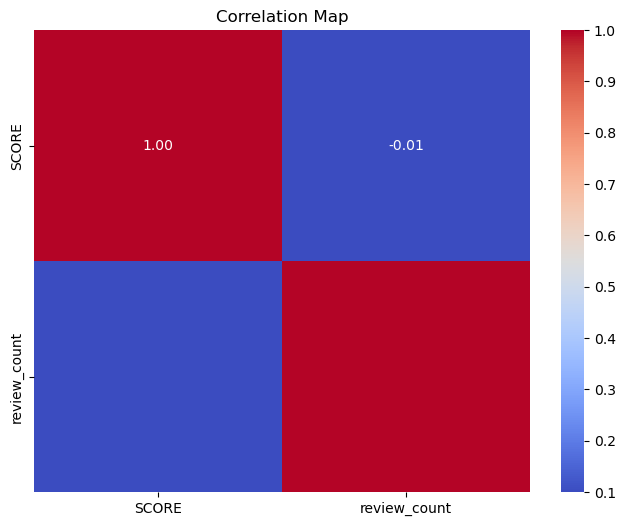

In [25]:
numeric_columns = ['SCORE', 'review_count']

mdf_numeric = mdf[numeric_columns].apply(pd.to_numeric, errors='coerce').dropna()

c_matrix = mdf_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=.1, vmax=1)
plt.title('Correlation Map')
plt.show()

- It seems like the correlation between SCORE and review_count is relatively low (0.17), and therefore it is not visually prominent on the heatmap.

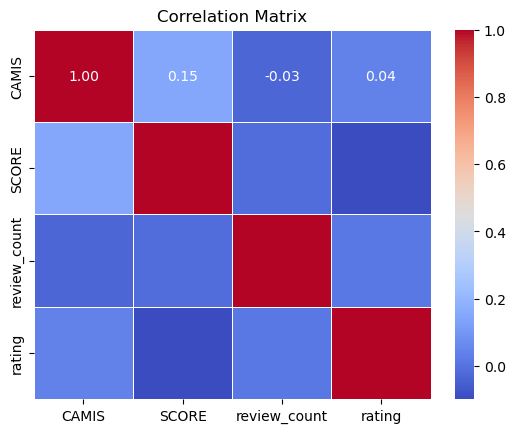

In [26]:
# Assuming 'restaurant_name' is a non-numeric column
numeric_data = mdf.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# **Visualizations**

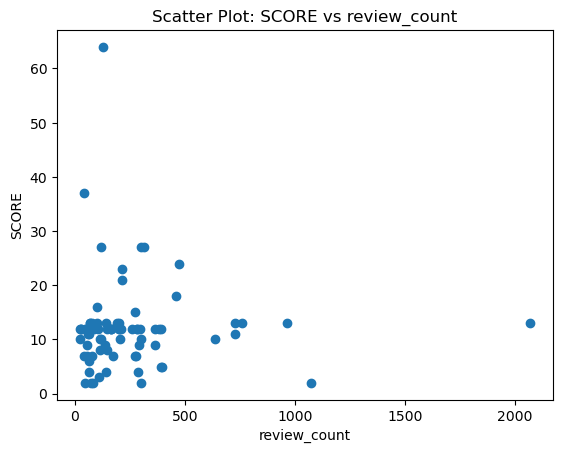

In [27]:
plt.scatter(mdf_numeric['review_count'], mdf_numeric['SCORE'])
plt.xlabel('review_count')
plt.ylabel('SCORE')
plt.title('Scatter Plot: SCORE vs review_count')
plt.show()

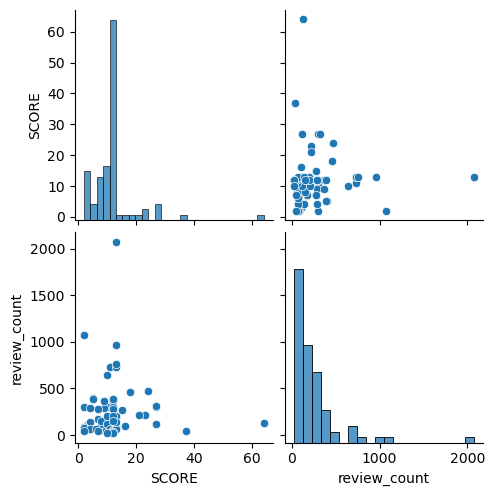

In [28]:
sns.pairplot(mdf_numeric)
plt.show()

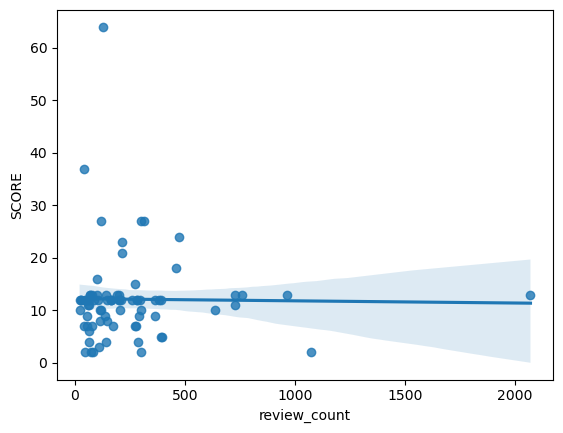

In [29]:
sns.regplot(x='review_count', y='SCORE', data=mdf_numeric)
plt.show()

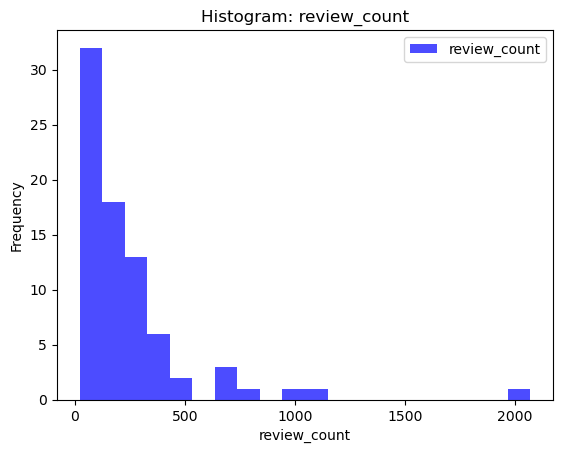

In [30]:
plt.hist(mdf_numeric['review_count'], bins=20, color='blue', alpha=0.7, label='review_count')
plt.xlabel('review_count')
plt.ylabel('Frequency')
plt.title('Histogram: review_count')
plt.legend()
plt.show()

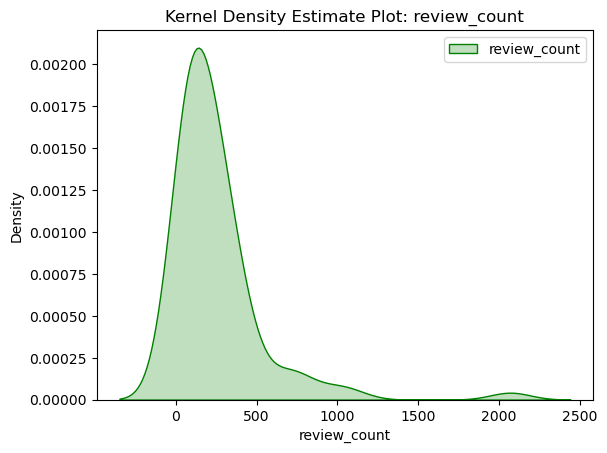

In [31]:
sns.kdeplot(mdf_numeric['review_count'], shade=True, color='green', label='review_count')
plt.xlabel('review_count')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot: review_count')
plt.legend()
plt.show()

In [32]:
# Filtering out the restaurants with more review counts and better scores
df_filtered = mdf[(mdf['review_count'] >= 200)]

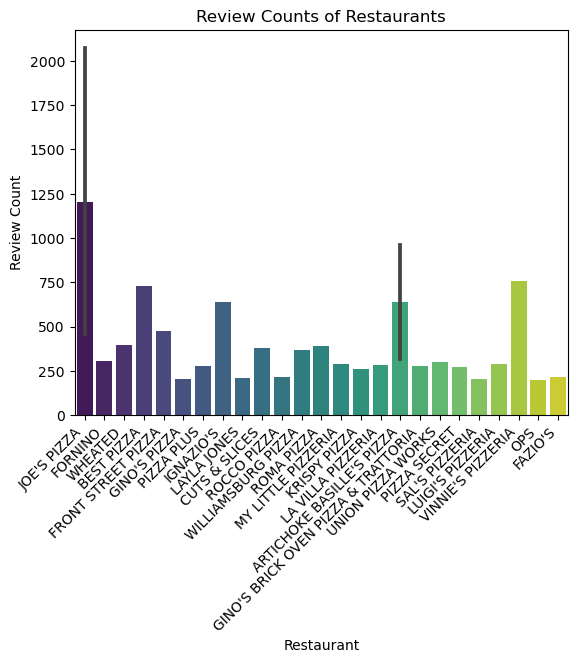

In [33]:
# Bar plot for review counts
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='name', y='review_count', data=df_filtered, palette='viridis')
plt.title('Review Counts of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right');

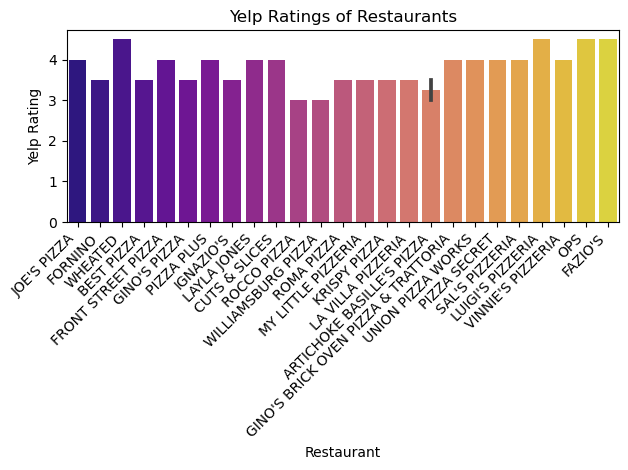

In [34]:
# Bar plot for Yelp ratings
plt.subplot(1, 1, 1)
sns.barplot(x='name', y='rating', data=df_filtered, palette='plasma')
plt.title('Yelp Ratings of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Yelp Rating')
plt.xticks(rotation=45, ha='right')
# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()